In [1]:
%load_ext autoreload
%autoreload 2

import typing as tp

from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

import tree_visualisation

Алгоритм отрисовки лежит в файле `tree_visualisation.py`

In [68]:
def draw_tree(
    tree: nx.DiGraph, 
    min_allowed_margin: int = 1,
    axis_type: str = 'on',
    figsize: tp.Tuple[int, int] = (20,10),
    **plot_kwargs
):
    layout = tree_visualisation.get_layered_layout(
        tree, min_allowed_margin
    )
    coordinates = np.vstack(list(layout.values()))
    xlims = (
        np.floor(np.min(coordinates[:, 0])) - 1, 
        np.ceil(np.max(coordinates[:, 0]) + 1)
    )
    ylims = (
        np.floor(np.min(coordinates[:, 1])) - 1, 
        np.ceil(np.max(coordinates[:, 1]) + 1)
    )
    
    fig, ax = plt.subplots(figsize=figsize)
    plt.axis(axis_type)
    nx.draw_networkx(
        tree, 
        pos=layout, 
        ax=ax, 
        **plot_kwargs
    )
    
    xgrid = np.arange(xlims[0], xlims[1] + 1, dtype=int)
    ax.set_xticks(xgrid)
    ax.set_xticklabels(xgrid)
    
    ygrid = np.arange(ylims[0], ylims[1] + 1, dtype=int)
    ax.set_yticks(ygrid)
    ax.set_yticklabels(ygrid)
    
    plt.tick_params(
        axis='both', 
        left=True, 
        bottom=True, 
        labelleft=True, 
        labelbottom=True,
        labelrotation=20
    )

    ax.tick_params(
        direction='out', 
        length=6, 
        width=2, 
        colors='b',
        grid_color='b', 
        grid_alpha=0.5
    )

    # Делаем границы вершин чёрными
    ax.collections[0].set_edgecolor("#000000")
    plt.grid(True)
    plt.show()

## Случайное корневое бинарное дерево

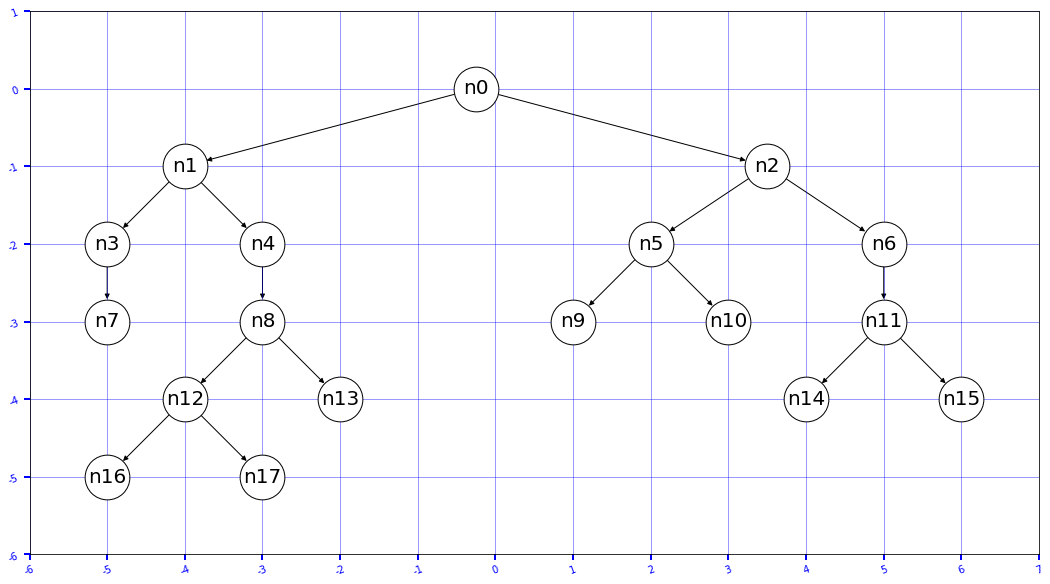

In [69]:
tree = nx.read_graphml('sample-data/binary_tree.xml')

draw_tree(
    tree, 
    axis_type='square',
    min_allowed_margin=2,
    node_size=2000,
    node_color='white', 
    font_size=20,
    with_labels=True
)

## Полное корневое бинарное дерево

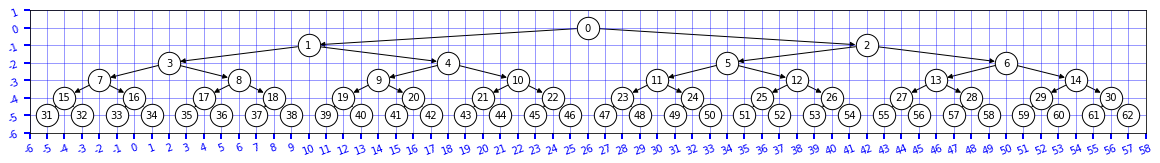

In [72]:
tree = nx.balanced_tree(r=2, h=5, create_using=nx.DiGraph)

draw_tree(
    tree, 
    axis_type='square',
    min_allowed_margin=2,
    node_size=500,
    node_color='white', 
    font_size=10,
    with_labels=True, 
)